# MNIST Neural-Network

In this notebook we are going to apply machine learning (ML) to the MNIST hand-written digits dataset. Here we will be looking at different Neural Network architecture to perform digit recognition. To do this, you will need to install and import Keras and Tensorfow packages as seen below:

In [133]:
#Import the required packages
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns

import keras
from keras import Sequential
from keras.optimizers import Adam
from sklearn.utils.multiclass import type_of_target

from keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Activation, Bidirectional, RepeatVector, Input

## Load the dataset 

In [134]:
#import the MNIST dataset
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
#Number of classes in the datset = 10
set(train['label'])
len(set(train['label']))

10

In [136]:
#the labels
set(train['label'])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

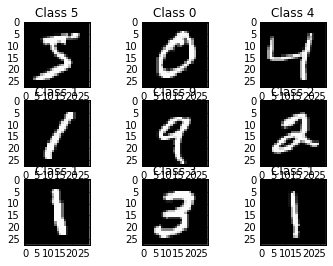

In [137]:
#Show the first 9 images in the dataset
for i in range(9):
    plt.subplot(3,3,i+1)
    first_image = train.iloc[i,1:785]
    first_image = np.array(first_image, dtype='float')
    pixels = first_image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray',interpolation='none')
    plt.title("Class {}".format(train.iloc[i,0]))

When training neural networks (NN) it is important to make sure your training datset is evenly distributed and thus contained a balanced classes. Unbalanced class will result in a bias model as NN's tend to be lazy and will take majority rule. As we can see from the plot below the MNIST dataset contains balanced classes thus no additional data manipluation is needed. 

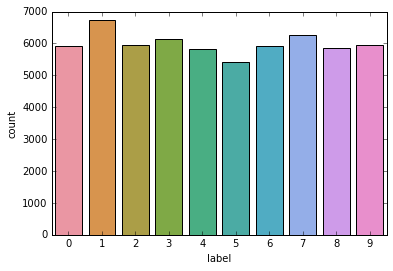

In [138]:
#plot the distribution of the training data
sns.countplot(train['label'])

## Format the data

The dataset has already been broken into a training and test set (85/25). When using neural networks it is a good practice to linearly scale  the datat reducing the range of inputa variables from 0-255 to 0-1. Normalization is needed because it removes geometrical biases towards some of the dimensions of the data vectors. This is intended for faster approaching to global minima at error surface.

In [157]:
#define the test  and training data
x_train = train.iloc[0:len(train),1:785]
x_test = test.iloc[0:len(test),1:785]
y_train =train.iloc[0:len(train),0]
y_test = test.iloc[0:len(test),0]

print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [158]:
#scale input data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train/255
x_test = x_test/255

In [159]:
y_train = y_train.astype('int32')
y_test = y_test.astype('int32')

Y_train = keras.utils.to_categorical(y_train, num_classes=10)
Y_test = keras.utils.to_categorical(y_test, num_classes=10)

print("Training target matrix shape", Y_train.shape)
print("Testing target matrix shape", Y_test.shape)

Training target matrix shape (60000, 10)
Testing target matrix shape (10000, 10)


## Build the Neural Network

For the first iteration, lets build a basic Feed Forward Neural Network which has an input layer, one hiddne layer and an output layer. This this case we create a network with one hidden layers with 15 neurons as seen in the image below, and an output layer with 10 neurons.  

This is a categorical (10 class) problem and this use need an output layer of 10 neurons with a 'softmax' activation function. For binary (2-class) problems, one node can be used in the output layer with a sigmoid function. 

Activation functions are an extremely important feature of the artificial neural networks. They basically decide whether a neuron should be activated or not. Whether the information that the neuron is receiving is relevant for the given information or should it be ignored. The non-linear activation fucntion used in the hidden and input layer is the 'ReLu' activation. More information about various activations can be found in the linkn below:

https://en.wikipedia.org/wiki/Activation_function

![title](pic1.png)

In [172]:
model = Sequential()
model.add(Dense(15, input_shape=(784,),activation='relu'))    
model.add(Dropout(0.2))
model.add(Dense(15,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 15)                11775     
_________________________________________________________________
dropout_27 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_39 (Dense)             (None, 15)                240       
_________________________________________________________________
dropout_28 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)                160       
Total params: 12,175
Trainable params: 12,175
Non-trainable params: 0
_________________________________________________________________
None


In [177]:
batch_size = 128
num_epochs = 5

model.compile(loss='categorical_crossentropy', 
              #optimizer= Adam(lr=1e-03), 
              optimizer='adam',
              metrics=['accuracy'])

In [178]:
history = model.fit(x_train, Y_train,
          validation_split=0.2,
          #validation_data=(x_test,Y_test),
          #verbose=1,
          batch_size=batch_size, epochs=num_epochs)

history = history.history
val_acc = history['val_acc'][-1]
val_loss = history['val_loss'][-1]
print ('Validation accuracy: {acc}, val_loss: {loss}'.format(
            acc=val_acc, loss=val_loss))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 2s 40us/step - loss: 0.5712 - acc: 0.8214 - val_loss: 0.3118 - val_acc: 0.9151
Epoch 2/5
48000/48000 [==============================] - 1s 27us/step - loss: 0.5432 - acc: 0.8302 - val_loss: 0.2969 - val_acc: 0.9172
Epoch 3/5
48000/48000 [==============================] - 1s 28us/step - loss: 0.5344 - acc: 0.8339 - val_loss: 0.2961 - val_acc: 0.9194
Epoch 4/5
48000/48000 [==============================] - 1s 28us/step - loss: 0.5190 - acc: 0.8389 - val_loss: 0.2879 - val_acc: 0.9202
Epoch 5/5
48000/48000 [==============================] - 1s 28us/step - loss: 0.5052 - acc: 0.8425 - val_loss: 0.2842 - val_acc: 0.9219
Validation accuracy: 0.9219166668256124, val_loss: 0.28423027777671817


In [179]:
final_loss, final_acc = model.evaluate(x_train,Y_train, verbose=0)
print("Train loss: {0:.2f}, Train accuracy: {1:.2f}%".format(final_loss, final_acc*100))

Train loss: 0.27, Train accuracy: 92.57%


In [180]:
final_loss, final_acc = model.evaluate(x_test,Y_test,verbose=0)

print("Test loss: {0:.2f}, Test accuracy: {1:.2f}%".format(final_loss, final_acc*100))

Test loss: 0.29, Test accuracy: 92.26%


In [181]:
from sklearn.metrics import confusion_matrix
predictions = model.predict_classes(x_test)

#fetch predictions
preds=predictions.tolist()
y_lbls = np.array(y_test.values)

cm_1 = confusion_matrix(y_lbls, preds)
print(pd.DataFrame(cm_1))

     0     1    2    3    4    5    6    7    8    9
0  960     0    0    1    0    5   10    3    1    0
1    0  1114    3    4    1    3    3    0    7    0
2   11     3  952   15    7    4   13    7   14    6
3    2     1   18  917    0   35    0   15   16    6
4    2     1    3    0  910    1   14    0    4   47
5    8     2    0   38   13  774   13    7   35    2
6   14     3    2    1    7   13  912    0    6    0
7    0     7   18    8    2    1    1  947    1   43
8    8    11    5   23   11   34   13   10  844   15
9    7     4    0   11   41   12    3   27    8  896


In [182]:
#Total number of number recignized in the test set
b = np.asarray(cm_1)
print('Total number of correct classifcations: ', np.trace(b))

Total number of correct classifcations:  9226


## Improve model architecture

we can play around with the network architecture and try a variety of set ups to improve the models performance. 
- Increase training time (epochs)
- Change batch size
- Add more hidden layers
- Use alternative activation functions
- Use alternative optimizer algorithms
- Add learning rates

See model below:

In [183]:
model = Sequential()
model.add(Dense(512, input_shape=(784,),activation='relu'))    
model.add(Dropout(0.2))
model.add(Dense(200,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_29 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 200)               102600    
_________________________________________________________________
dropout_30 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_31 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 10)                1010      
Total para

In [184]:
batch_size = 128
num_epochs = 10

model.compile(loss='categorical_crossentropy', 
              #optimizer= Adam(lr=1e-03), 
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, Y_train,
          validation_split=0.2,
          #validation_data=(x_test,Y_test),
          #verbose=1,
          batch_size=batch_size, epochs=num_epochs)

history = history.history
val_acc = history['val_acc'][-1]
val_loss = history['val_loss'][-1]
print ('Validation accuracy: {acc}, val_loss: {loss}'.format(
            acc=val_acc, loss=val_loss))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 6s 120us/step - loss: 0.3498 - acc: 0.8931 - val_loss: 0.1371 - val_acc: 0.9573
Epoch 2/10
48000/48000 [==============================] - 5s 100us/step - loss: 0.1367 - acc: 0.9601 - val_loss: 0.0965 - val_acc: 0.9717
Epoch 3/10
48000/48000 [==============================] - 5s 99us/step - loss: 0.0979 - acc: 0.9705 - val_loss: 0.0861 - val_acc: 0.9743
Epoch 4/10
48000/48000 [==============================] - 5s 99us/step - loss: 0.0792 - acc: 0.9761 - val_loss: 0.0838 - val_acc: 0.9765
Epoch 5/10
48000/48000 [==============================] - 5s 99us/step - loss: 0.0633 - acc: 0.9810 - val_loss: 0.0766 - val_acc: 0.9797
Epoch 6/10
48000/48000 [==============================] - 5s 100us/step - loss: 0.0525 - acc: 0.9837 - val_loss: 0.0894 - val_acc: 0.9760
Epoch 7/10
48000/48000 [==============================] - 5s 102us/step - loss: 0.0480 - acc: 0.9850 - val_loss: 0.0991 - val

In [185]:
final_loss1, final_acc1 = model.evaluate(x_train,Y_train, verbose=0)
print("Train loss: {0:.2f}, Train accuracy: {1:.2f}%".format(final_loss1, final_acc1*100))

final_loss2, final_acc2 = model.evaluate(x_test,Y_test,verbose=0)

print("Test loss: {0:.2f}, Test accuracy: {1:.2f}%".format(final_loss2, final_acc2*100))

Train loss: 0.03, Train accuracy: 99.22%
Test loss: 0.08, Test accuracy: 98.00%
